Build a regression model.

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [18]:
# import data
data = pd.read_csv('../data/merged_clean_results.csv')
data = data.drop(columns=data.columns[0], axis=1) # remove duplicated index column
data

,name,latitude,longitude,review_count,rating_avg,distance_avg,category
0,Light House Cinema,53.350230,-6.279696,NaN,4.55,177.000000,Indie Movie Theater
1,JJ's Bar,53.350230,-6.279696,NaN,4.15,285.000000,Cocktail Bar
2,Token,53.350230,-6.279696,NaN,4.35,286.000000,Arcade
3,The Reserve Bar,53.350230,-6.279696,NaN,3.75,287.000000,Whisky Bar
4,Old Jameson Distillery,53.350230,-6.279696,NaN,4.45,291.000000,Tour Provider
...,...,...,...,...,...,...,...
2853,Mother Red Caps,53.342081,-6.275233,1.0,3.00,194.604888,Pubs
2854,Ginger Cafe&Deli,53.342081,-6.275233,1.0,5.00,204.609678,Cafes
2855,Vincenzo's Pizzeria,53.342081,-6.275233,8.0,3.50,219.192786,Pizza
2856,Coke Lane Pizza @ Lucky's,53.342081,-6.275233,2.0,4.00,226.257635,Pizza


Add bike information (free_bikes and empty_slots) from citybikes.csv

In [17]:
# import bikes data
bikes = pd.read_csv('../data/citybikes.csv')
bikes = bikes.drop(columns=bikes.columns[0], axis=1) # remove duplicated index column
bikes

,name,latitude,longitude,free_bikes,empty_slots
0,GEORGES LANE,53.350230,-6.279696,21,19
1,NORTH CIRCULAR ROAD (O'CONNELL'S),53.357841,-6.251557,22,8
2,PHIBSBOROUGH ROAD,53.356307,-6.273717,17,23
3,SMITHFIELD NORTH,53.349562,-6.278198,29,1
4,CLONMEL STREET,53.336021,-6.262980,0,33
...,...,...,...,...,...
109,JAMES STREET EAST,53.336597,-6.248109,3,27
110,PARNELL SQUARE NORTH,53.353742,-6.265301,6,14
111,FOWNES STREET UPPER,53.344603,-6.263371,19,11
112,SMITHFIELD,53.347692,-6.278214,21,9


In [19]:
merged_data = pd.merge(data, bikes, on=['latitude','longitude'], suffixes=('_d','_b'))
merged_data

,name_d,latitude,longitude,review_count,rating_avg,distance_avg,category,name_b,free_bikes,empty_slots
0,Light House Cinema,53.350230,-6.279696,NaN,4.55,177.000000,Indie Movie Theater,GEORGES LANE,21,19
1,JJ's Bar,53.350230,-6.279696,NaN,4.15,285.000000,Cocktail Bar,GEORGES LANE,21,19
2,Token,53.350230,-6.279696,NaN,4.35,286.000000,Arcade,GEORGES LANE,21,19
3,The Reserve Bar,53.350230,-6.279696,NaN,3.75,287.000000,Whisky Bar,GEORGES LANE,21,19
4,Old Jameson Distillery,53.350230,-6.279696,NaN,4.45,291.000000,Tour Provider,GEORGES LANE,21,19
...,...,...,...,...,...,...,...,...,...,...
2853,HSQ Cafe,53.339005,-6.300217,3.0,3.50,694.330528,Cafes,BROOKFIELD ROAD,15,15
2854,Insomnia,53.339005,-6.300217,1.0,4.00,703.634821,Patisserie/Cake Shop,BROOKFIELD ROAD,15,15
2855,Rialto Take-Away,53.339005,-6.300217,2.0,2.50,732.747289,Fast Food,BROOKFIELD ROAD,15,15
2856,Good Luck Chinese Take Away,53.339005,-6.300217,4.0,3.50,749.598604,Fast Food,BROOKFIELD ROAD,15,15


Visualize relationships between numeric variables:

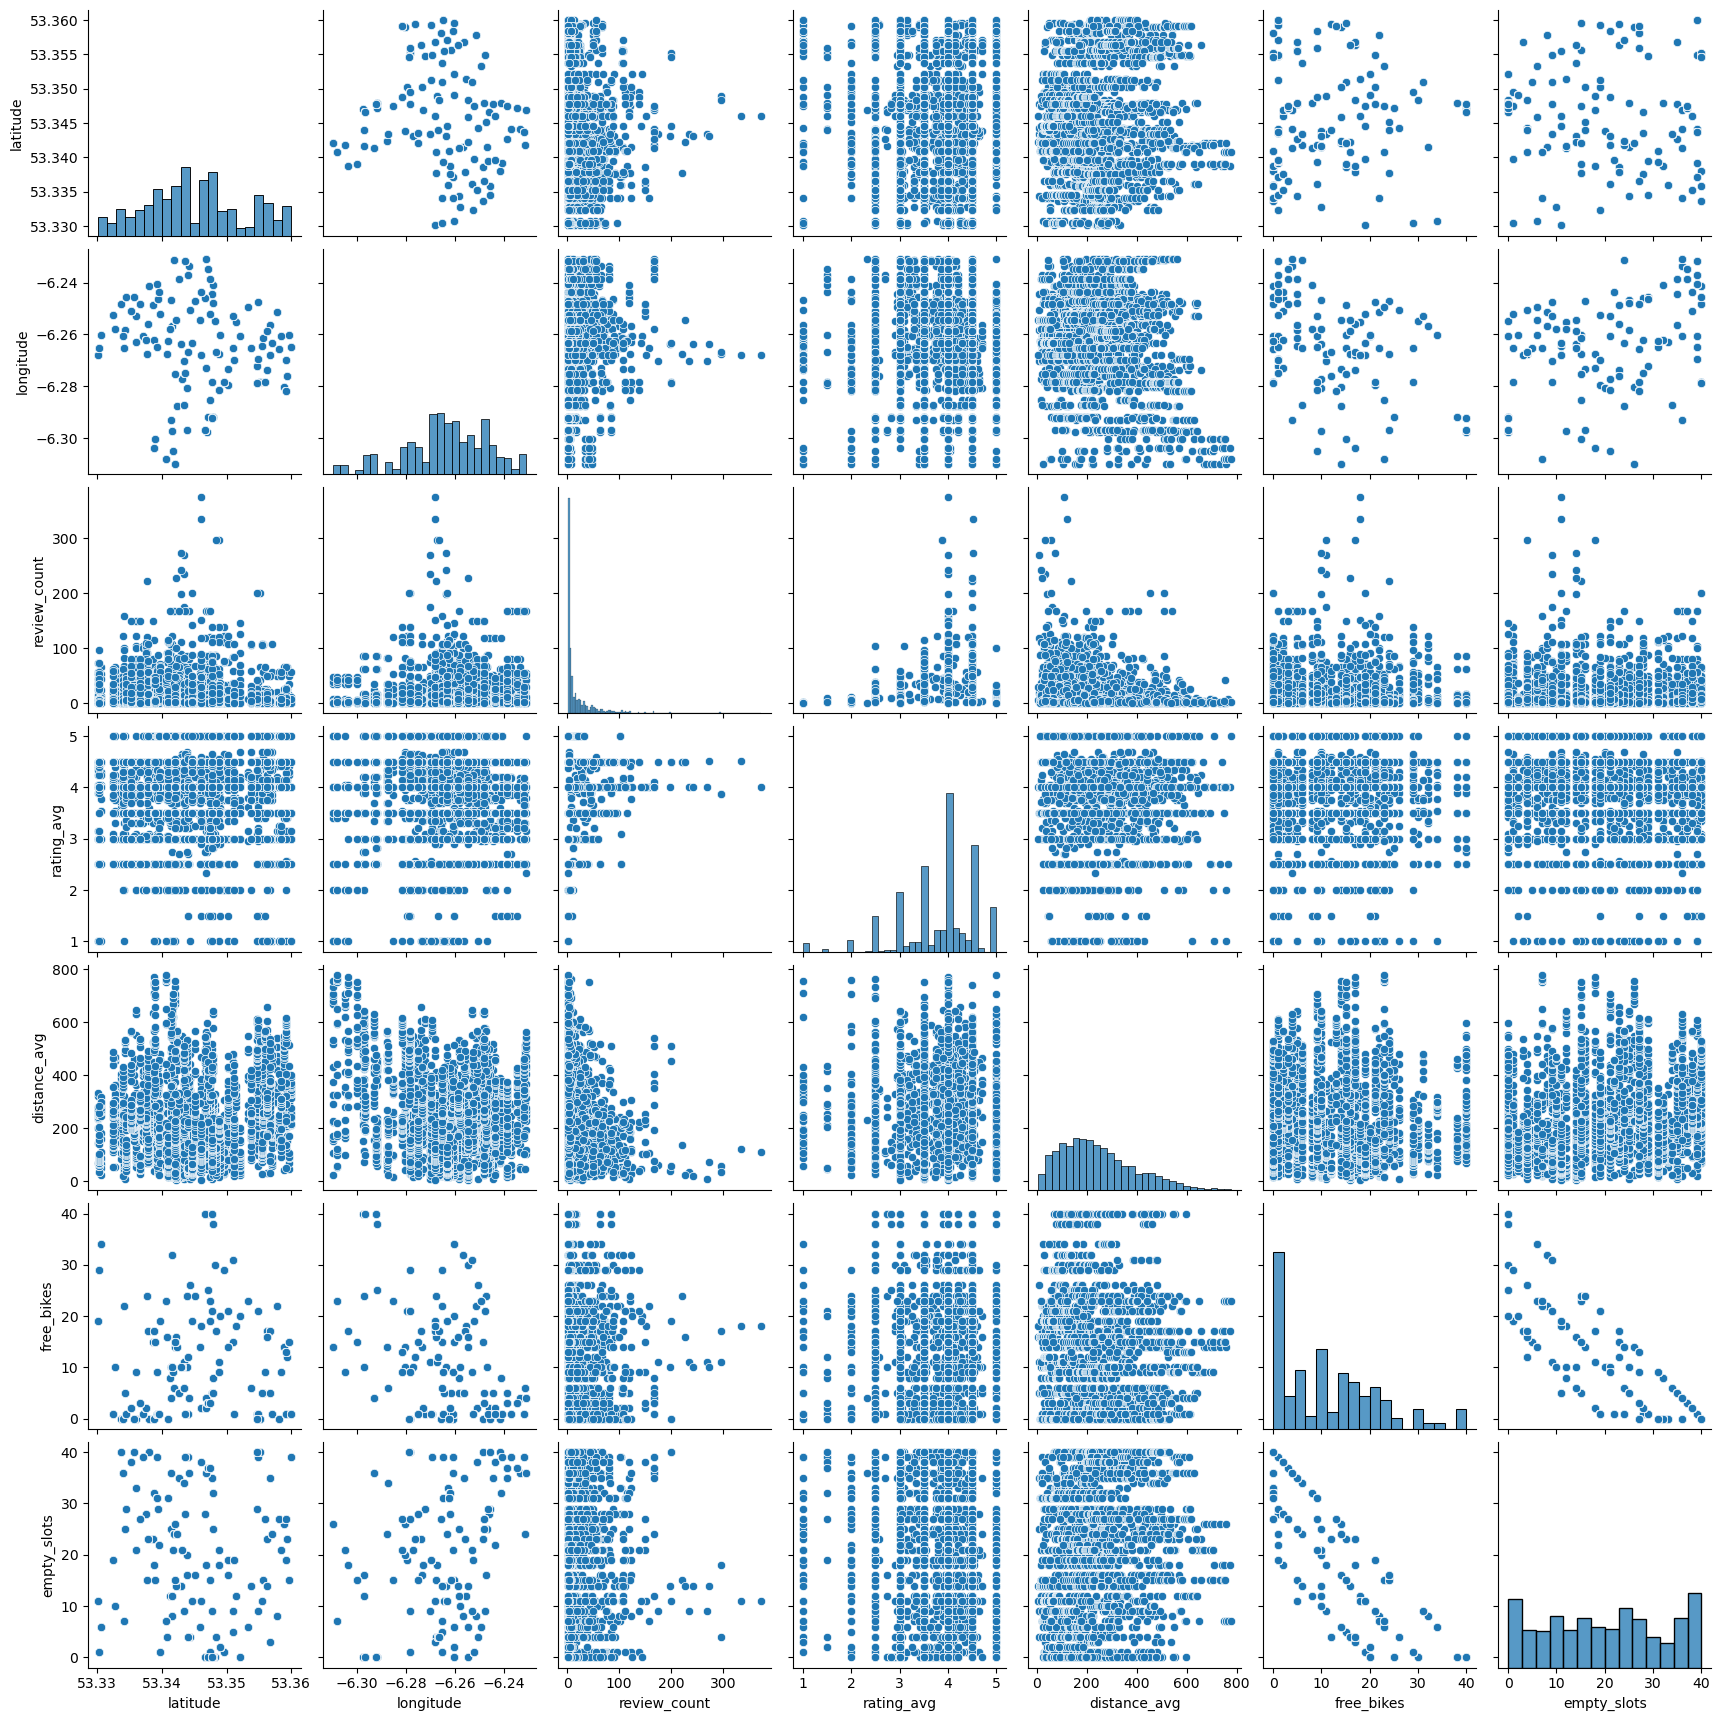

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=merged_data)
plt.show()

It appears that no variables are meaningfully correlated with each other.
- only free_bikes and empty_slots, which are inherently correlated

In [22]:
# check correlation values anyways
merged_data.corr(numeric_only=True)

,latitude,longitude,review_count,rating_avg,distance_avg,free_bikes,empty_slots
latitude,1.000000,-0.153475,-0.118020,0.001623,0.139003,0.030391,-0.082265
longitude,-0.153475,1.000000,0.096123,-0.002592,-0.182752,-0.375303,0.323444
review_count,-0.118020,0.096123,1.000000,0.144885,-0.161735,-0.002135,-0.014353
rating_avg,0.001623,-0.002592,0.144885,1.000000,-0.011972,0.007205,-0.044783
distance_avg,0.139003,-0.182752,-0.161735,-0.011972,1.000000,-0.080635,0.221306
free_bikes,0.030391,-0.375303,-0.002135,0.007205,-0.080635,1.000000,-0.797587
empty_slots,-0.082265,0.323444,-0.014353,-0.044783,0.221306,-0.797587,1.000000


Based on correlation results and visualizations in joining_data notebook, we will explore a simple linear regression model using distance to predict review_count.

Filter data to only include rows where review_count is not null:

In [24]:
data_rcnotnull = merged_data[merged_data['review_count'].notna()]

In [25]:
y = data_rcnotnull['review_count']
x = data_rcnotnull['distance_avg']
x = sm.add_constant(x)
x.head()

,const,distance_avg
8,1.0,45.574658
9,1.0,64.668846
10,1.0,92.167605
11,1.0,119.866129
12,1.0,133.331760


Provide model output and an interpretation of the results. 

In [26]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           review_count   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     59.58
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           1.76e-14
Time:                        14:21:52   Log-Likelihood:                -10920.
No. Observations:                2220   AIC:                         2.184e+04
Df Residuals:                    2218   BIC:                         2.186e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           28.0862      1.300     21.604   

##### Output interpretation:
R-squared values are very low
- this suggests that very little of the variance in review count can be explained by distance

The p-value is also very low 
- this suggests that distance does have an effect on review count

Overall, this model is not a strong one.

##### Examine whether taking the log of review_count improves the model (adjusting for skew)

In [27]:
y = np.log(data_rcnotnull['review_count'])
x = data_rcnotnull['distance_avg']
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           review_count   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     73.76
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           1.63e-17
Time:                        14:22:04   Log-Likelihood:                -3935.2
No. Observations:                2220   AIC:                             7874.
Df Residuals:                    2218   BIC:                             7886.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.3533      0.056     42.089   

Interpretation: a log model improves the R-squared value, but it is still very low.

### Explore multivariate linear regression model

Examine whether free_bikes and distance are correlated with review_count


In [29]:
y = data_rcnotnull['review_count']
x = data_rcnotnull[['distance_avg', 'free_bikes']]
x = sm.add_constant(x)
x.head()

,const,distance_avg,free_bikes
8,1.0,45.574658,21
9,1.0,64.668846,21
10,1.0,92.167605,21
11,1.0,119.866129,21
12,1.0,133.331760,21


In [30]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           review_count   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     29.89
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           1.55e-13
Time:                        14:23:51   Log-Likelihood:                -10920.
No. Observations:                2220   AIC:                         2.185e+04
Df Residuals:                    2217   BIC:                         2.186e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           28.4881      1.554     18.331   

Interpretation: adding free_bikes as a parameter decreases the strength of the model.

# Stretch

How can you turn the regression model into a classification model?